# I. Import thư viện

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from joblib import dump, load

In [84]:
#from google.colab import drive
#drive.mount('/content/drive')

# II. Đọc dữ liệu

In [85]:
#df = pd.read_csv('/content/drive/MyDrive/DS317/df.csv')
df = pd.read_csv('D:\Learning\Semester 1 year 4\DS317\Project\Data\Preprocessed_Data_IncludeCTN_For_Models.csv')

# III. Xây dựng mô hình




In [86]:
X = df.drop(columns={'xeploai'})
y = df['xeploai']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
labels = ['Rớt', 'Trung bình', 'Trung bình khá', 'Khá', 'Giỏi', 'Xuất sắc']

In [89]:
def visualization(y_test, y_pred):
  print('Weighted f1_score: ',f1_score(y_test, y_pred, average='weighted'))
  print('Macro f1_score: ',f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [90]:
def make_results_df(orginal, res_list):
    df_res = pd.DataFrame({
        'Accuracy': [accuracy_score(orginal, u) for u in res_list],
        'Precision': [precision_score(orginal, u, average='macro') for u in res_list],
        'Recall': [recall_score(orginal, u, average='macro') for u in res_list],
        'F1-macro': [f1_score(orginal, u, average='macro') for u in res_list]
    }, index=['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
    return df_res

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 5223 to 7270
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   namsinh         6260 non-null   float64
 1   gioitinh        6260 non-null   float64
 2   noisinh         6260 non-null   int64  
 3   khoa            6260 non-null   int64  
 4   hedt            6260 non-null   int64  
 5   khoahoc         6260 non-null   float64
 6   chuyennganh2    6260 non-null   int64  
 7   tinhtrang       6260 non-null   float64
 8   diachi_tinhtp   6260 non-null   int64  
 9   diemnamhoc1     6260 non-null   float64
 10  diemnamhoc2     6260 non-null   float64
 11  diemnamhoc3     6260 non-null   float64
 12  diem_3_5        6260 non-null   float64
 13  drlnam1         6260 non-null   float64
 14  drlnam2         6260 non-null   float64
 15  drlnam3         6260 non-null   float64
 16  drl_3_5         6260 non-null   float64
 17  dien_tt         6260 non-null 

## 1. Xét 3.5 năm học 

### a) Decision Tree

In [92]:
model_dt = DecisionTreeClassifier(random_state=42)

In [93]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9154451501645188
Macro f1_score:  0.7298106414657655
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1165
           1       0.81      0.72      0.76        18
           2       0.54      0.54      0.54        50
           3       0.80      0.82      0.81       227
           4       0.71      0.74      0.72       102
           5       0.67      0.50      0.57         4

    accuracy                           0.92      1566
   macro avg       0.75      0.71      0.73      1566
weighted avg       0.92      0.92      0.92      1566



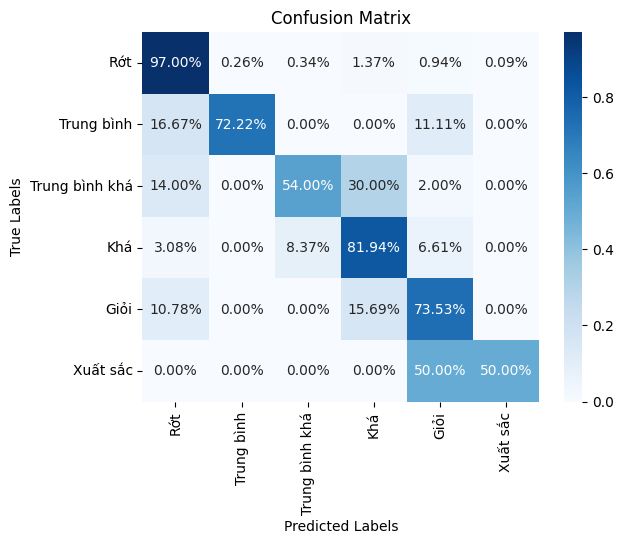

In [94]:
visualization(y_test, y_pred_dt)

### b) Random Forest

In [95]:
model_rf = RandomForestClassifier(random_state=42)

In [96]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9390576102651499
Macro f1_score:  0.6906459142188756
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.80      0.89      0.84        18
           2       0.71      0.60      0.65        50
           3       0.84      0.92      0.88       227
           4       0.77      0.81      0.79       102
           5       0.00      0.00      0.00         4

    accuracy                           0.94      1566
   macro avg       0.69      0.70      0.69      1566
weighted avg       0.94      0.94      0.94      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

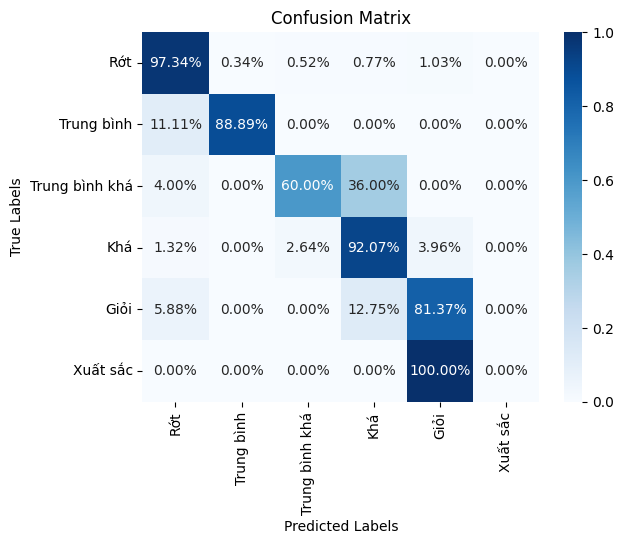

In [97]:
visualization(y_test, y_pred_rf)

### c) XGBoost

In [98]:
model_xg = XGBClassifier(random_state=42)

In [99]:
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9460054529832501
Macro f1_score:  0.8041557367227203
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.88      0.83      0.86        18
           2       0.74      0.68      0.71        50
           3       0.84      0.90      0.87       227
           4       0.81      0.85      0.83       102
           5       0.67      0.50      0.57         4

    accuracy                           0.95      1566
   macro avg       0.82      0.79      0.80      1566
weighted avg       0.95      0.95      0.95      1566



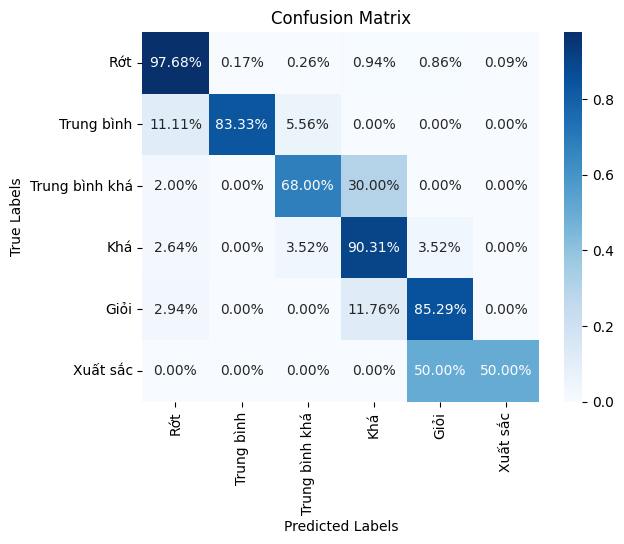

In [100]:
visualization(y_test, y_pred_xg)

### d) LightGBM

In [101]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [102]:
model_lgb.fit(X_train, y_train)
y_pred_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 30
[LightGBM] [Info] Start training from score -0.276878
[LightGBM] [Info] Start training from score -4.209336
[LightGBM] [Info] Start training from score -3.673031
[LightGBM] [Info] Start training from score -1.945112
[LightGBM] [Info] Start training from score -2.861402
[LightGBM] [Info] Start training from score -6.544711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

Weighted f1_score:  0.8880399030868237
Macro f1_score:  0.5774308177215356
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1165
           1       0.31      0.67      0.42        18
           2       0.43      0.46      0.45        50
           3       0.76      0.68      0.72       227
           4       0.65      0.74      0.69       102
           5       0.20      0.25      0.22         4

    accuracy                           0.88      1566
   macro avg       0.55      0.63      0.58      1566
weighted avg       0.89      0.88      0.89      1566



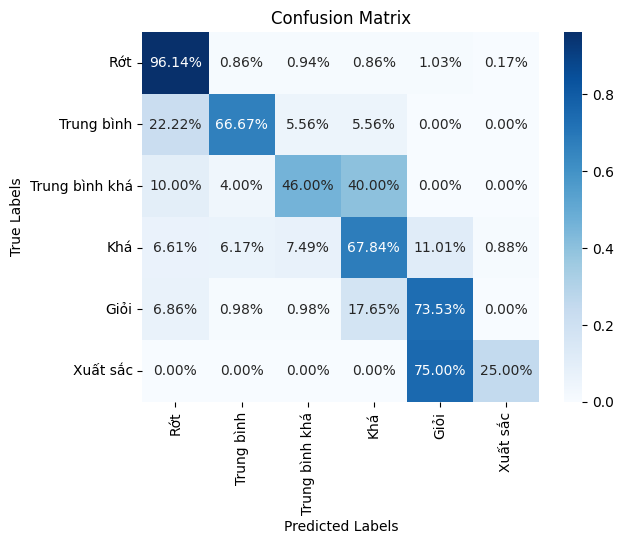

In [103]:
visualization(y_test, y_pred_lg)

### e) CatBoost

In [104]:
model_cb = CatBoostClassifier(random_state=42)

In [105]:
model_cb.fit(X_train, y_train)
y_pred_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.4772010	total: 43.6ms	remaining: 43.6s
1:	learn: 1.2617365	total: 53.5ms	remaining: 26.7s
2:	learn: 1.1091470	total: 65.1ms	remaining: 21.6s
3:	learn: 0.9921917	total: 73ms	remaining: 18.2s
4:	learn: 0.8961350	total: 82ms	remaining: 16.3s
5:	learn: 0.8110151	total: 89.2ms	remaining: 14.8s
6:	learn: 0.7424208	total: 98.5ms	remaining: 14s
7:	learn: 0.6822734	total: 105ms	remaining: 13s
8:	learn: 0.6304056	total: 114ms	remaining: 12.6s
9:	learn: 0.5850598	total: 122ms	remaining: 12s
10:	learn: 0.5413058	total: 130ms	remaining: 11.7s
11:	learn: 0.5062071	total: 138ms	remaining: 11.4s
12:	learn: 0.4733101	total: 148ms	remaining: 11.2s
13:	learn: 0.4440843	total: 156ms	remaining: 11s
14:	learn: 0.4178293	total: 166ms	remaining: 10.9s
15:	learn: 0.3954783	total: 177ms	remaining: 10.9s
16:	learn: 0.3732717	total: 189ms	remaining: 10.9s
17:	learn: 0.3553185	total: 197ms	remaining: 10.8s
18:	learn: 0.3385249	total: 207ms	remaining: 10.7s
19:	learn: 0.321

Weighted f1_score:  0.9452496212045438
Macro f1_score:  0.7724961248228338
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.88      0.78      0.82        18
           2       0.79      0.66      0.72        50
           3       0.85      0.93      0.89       227
           4       0.81      0.84      0.83       102
           5       1.00      0.25      0.40         4

    accuracy                           0.95      1566
   macro avg       0.88      0.74      0.77      1566
weighted avg       0.95      0.95      0.95      1566



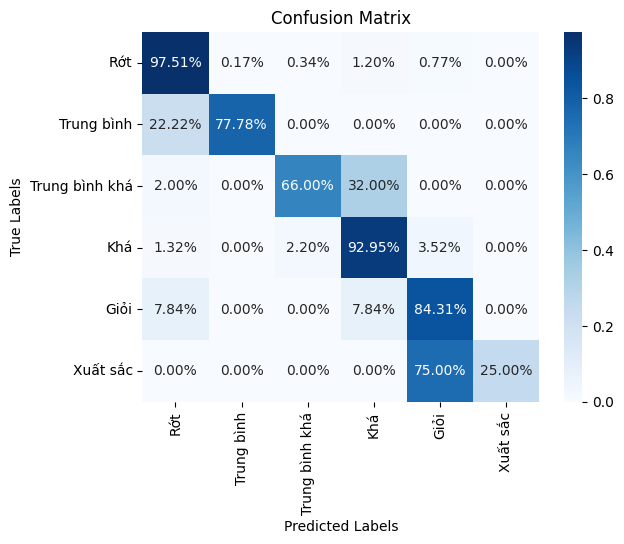

In [106]:
visualization(y_test, y_pred_cb)

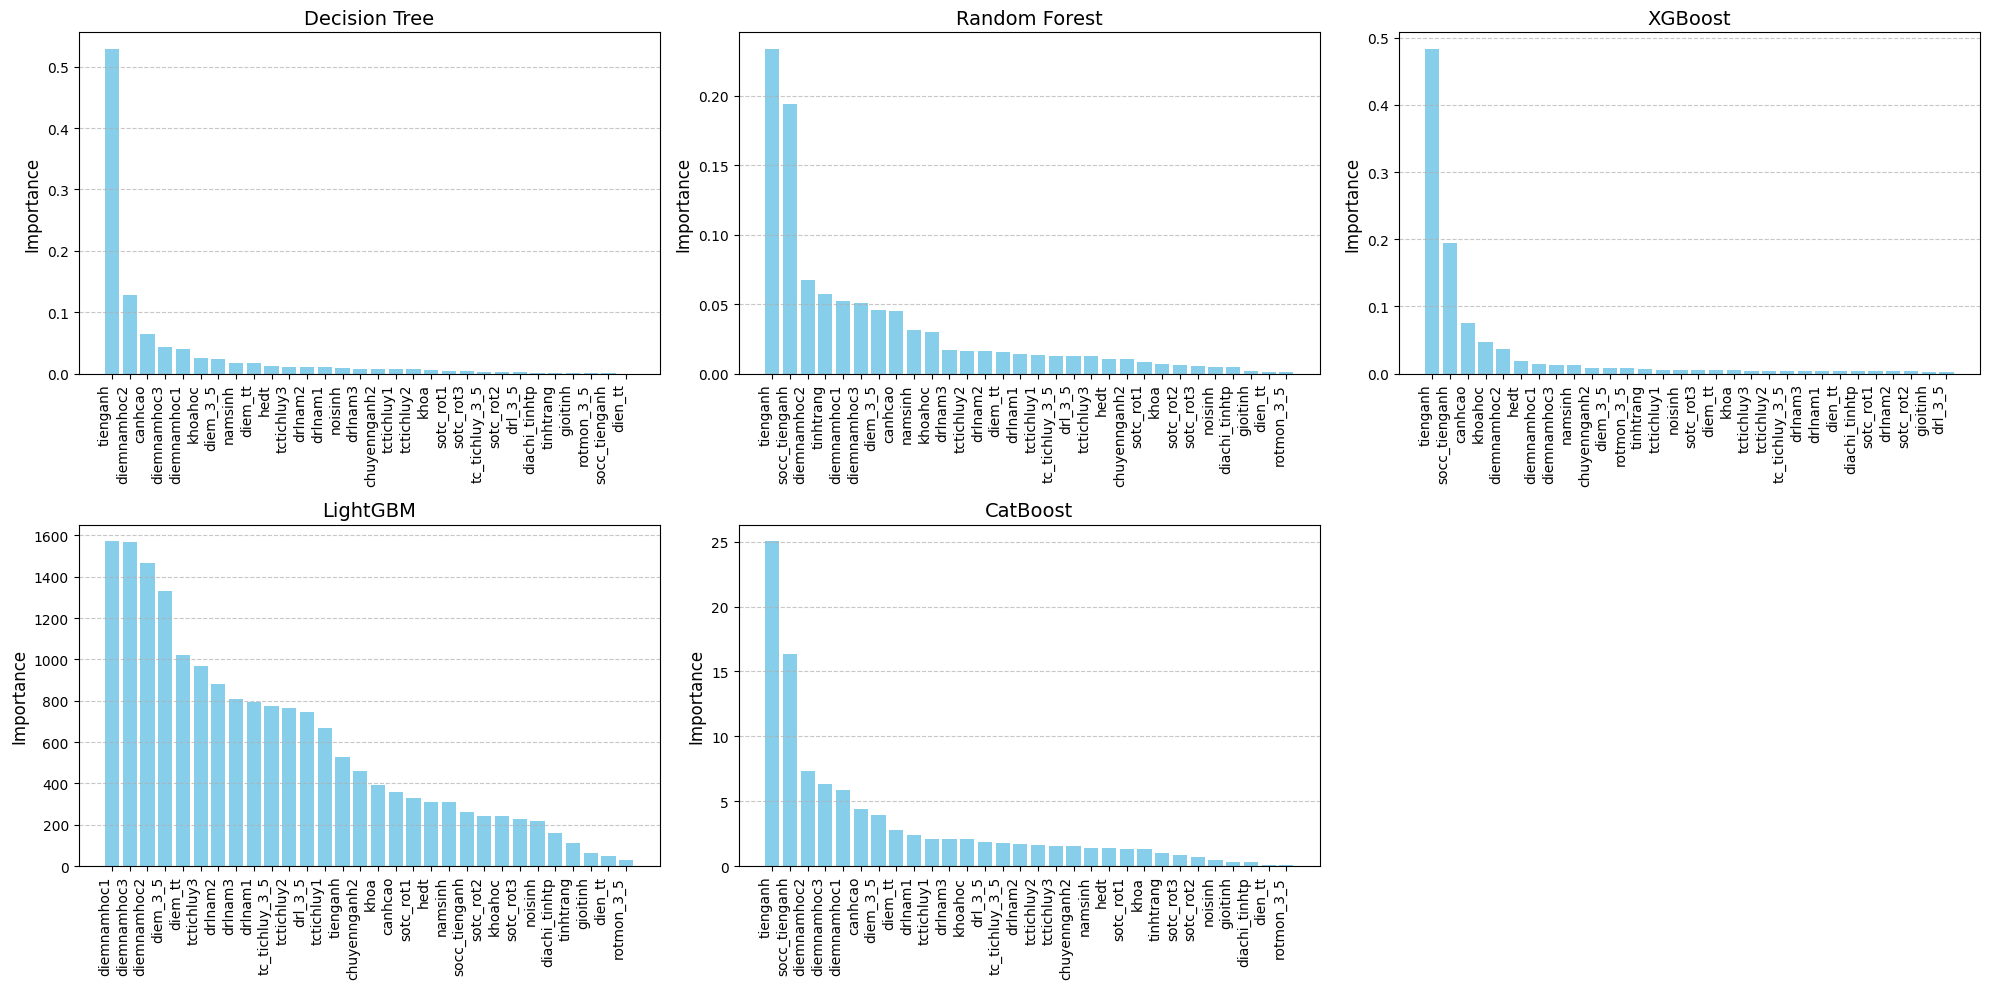

In [107]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# IV. Xây dựng mô hình với cân bằng nhãn

## 1. Sử dụng SMOTE

In [108]:
k_neighbors_config = {
    5: 2,  
    1: 5,  
    2: 7, 
    3: 10, 
    4: 10
}

smote_dict = {}
for label, k_neighbors in k_neighbors_config.items():
    smote_dict[label] = SMOTE(k_neighbors=k_neighbors)

X_train_resampled, y_train_resampled = X_train, y_train
for label, smote in smote_dict.items():
    if label in k_neighbors_config:
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

In [109]:
#smote = SMOTE(k_neighbors=3, random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [110]:
y_train_resampled.value_counts()

0    4746
3    4746
1    4746
2    4746
4    4746
5    4746
Name: xeploai, dtype: int64

### 1.1 Xét 3.5 năm học

#### a) Decision Tree

In [111]:
model_dt = DecisionTreeClassifier(random_state=42)

In [112]:
model_dt.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9226714267795055
Macro f1_score:  0.6875333143402521
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1165
           1       0.89      0.89      0.89        18
           2       0.72      0.68      0.70        50
           3       0.80      0.84      0.82       227
           4       0.73      0.75      0.74       102
           5       0.00      0.00      0.00         4

    accuracy                           0.92      1566
   macro avg       0.69      0.69      0.69      1566
weighted avg       0.92      0.92      0.92      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

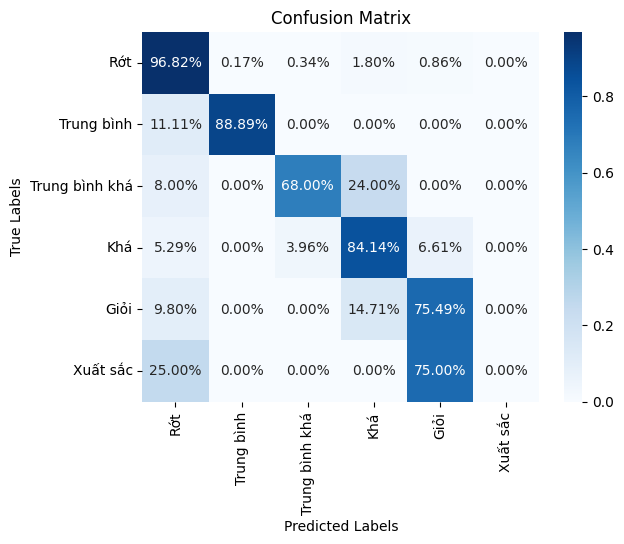

In [113]:
visualization(y_test, y_pred_resampled_dt)

#### b) Random Forest

In [114]:
model_rf = RandomForestClassifier(random_state=42)

In [115]:
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9401775051698689
Macro f1_score:  0.7142322430045357
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.75      0.66      0.70        50
           3       0.81      0.93      0.87       227
           4       0.74      0.91      0.82       102
           5       0.00      0.00      0.00         4

    accuracy                           0.94      1566
   macro avg       0.70      0.73      0.71      1566
weighted avg       0.94      0.94      0.94      1566



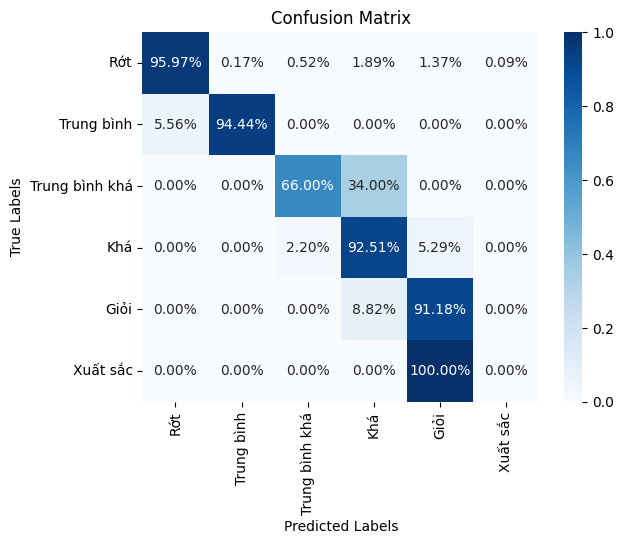

In [116]:
visualization(y_test, y_pred_resampled_rf)

#### c) XGBoost

In [117]:
model_xg = XGBClassifier(random_state=42)

In [118]:
model_xg.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9464944693288577
Macro f1_score:  0.8203461112972622
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.74      0.74      0.74        50
           3       0.86      0.89      0.88       227
           4       0.78      0.89      0.83       102
           5       0.67      0.50      0.57         4

    accuracy                           0.95      1566
   macro avg       0.82      0.82      0.82      1566
weighted avg       0.95      0.95      0.95      1566



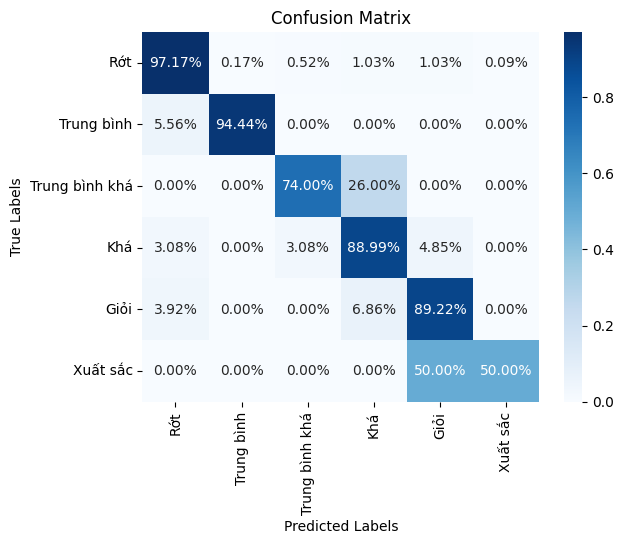

In [119]:
visualization(y_test, y_pred_resampled_xg)

#### d) LightGBM

In [120]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [121]:
model_lgb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5672
[LightGBM] [Info] Number of data points in the train set: 28476, number of used features: 30
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Weighted f1_score:  0.9466374269741705
Macro f1_score:  0.7229683176876655
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.70      0.70      0.70        50
           3       0.85      0.90      0.88       227
           4       0.82      0.91      0.86       102
           5       0.00      0.00      0.00         4

    accuracy                           0.95      1566
   macro avg       0.71      0.74      0.72      1566
weighted avg       0.95      0.95      0.95      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

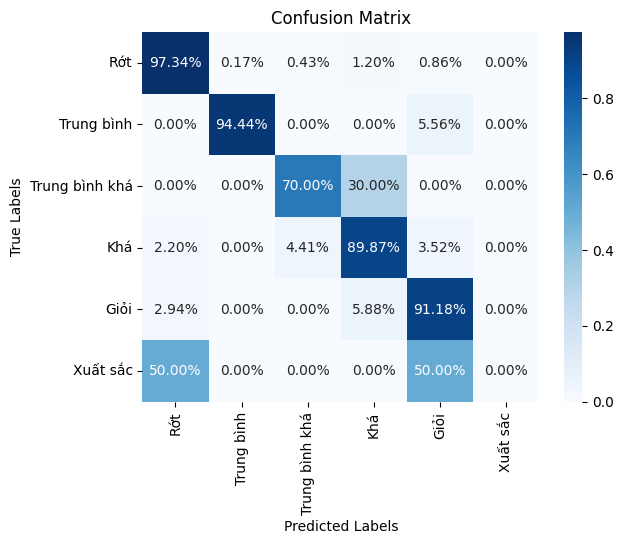

In [122]:
visualization(y_test, y_pred_resampled_lg)

#### e) CatBoost

In [123]:
model_cb = CatBoostClassifier(random_state=42)

In [124]:
model_cb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_cb = model_cb.predict(X_test)

Learning rate set to 0.093865
0:	learn: 1.4282597	total: 35.1ms	remaining: 35.1s
1:	learn: 1.2110409	total: 61.2ms	remaining: 30.5s
2:	learn: 1.0520238	total: 87.8ms	remaining: 29.2s
3:	learn: 0.9306923	total: 115ms	remaining: 28.5s
4:	learn: 0.8309969	total: 140ms	remaining: 28s
5:	learn: 0.7481386	total: 168ms	remaining: 27.9s
6:	learn: 0.6779795	total: 191ms	remaining: 27.1s
7:	learn: 0.6202717	total: 220ms	remaining: 27.3s
8:	learn: 0.5699289	total: 249ms	remaining: 27.4s
9:	learn: 0.5253090	total: 284ms	remaining: 28.1s
10:	learn: 0.4868588	total: 309ms	remaining: 27.7s
11:	learn: 0.4521202	total: 342ms	remaining: 28.1s
12:	learn: 0.4226533	total: 372ms	remaining: 28.2s
13:	learn: 0.3956165	total: 413ms	remaining: 29.1s
14:	learn: 0.3718450	total: 452ms	remaining: 29.7s
15:	learn: 0.3506458	total: 484ms	remaining: 29.7s
16:	learn: 0.3310811	total: 514ms	remaining: 29.7s
17:	learn: 0.3138672	total: 539ms	remaining: 29.4s
18:	learn: 0.2980759	total: 564ms	remaining: 29.1s
19:	learn:

Weighted f1_score:  0.9465588787367349
Macro f1_score:  0.7647460599650767
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1165
           1       0.78      1.00      0.88        18
           2       0.74      0.80      0.77        50
           3       0.86      0.90      0.88       227
           4       0.78      0.89      0.83       102
           5       0.25      0.25      0.25         4

    accuracy                           0.95      1566
   macro avg       0.73      0.80      0.76      1566
weighted avg       0.95      0.95      0.95      1566



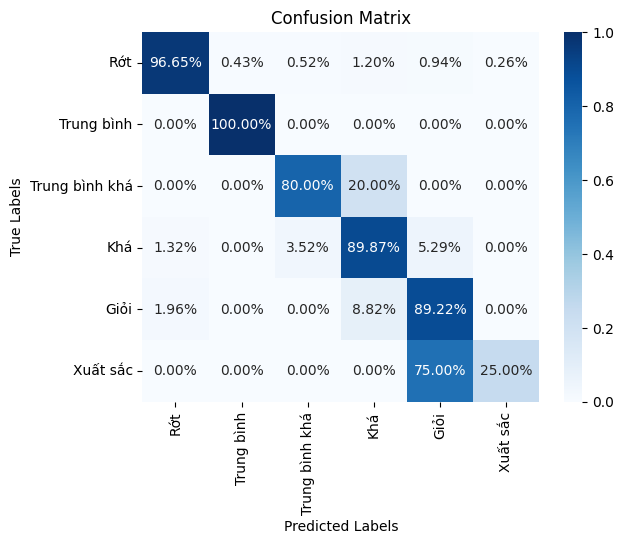

In [125]:
visualization(y_test, y_pred_resampled_cb)

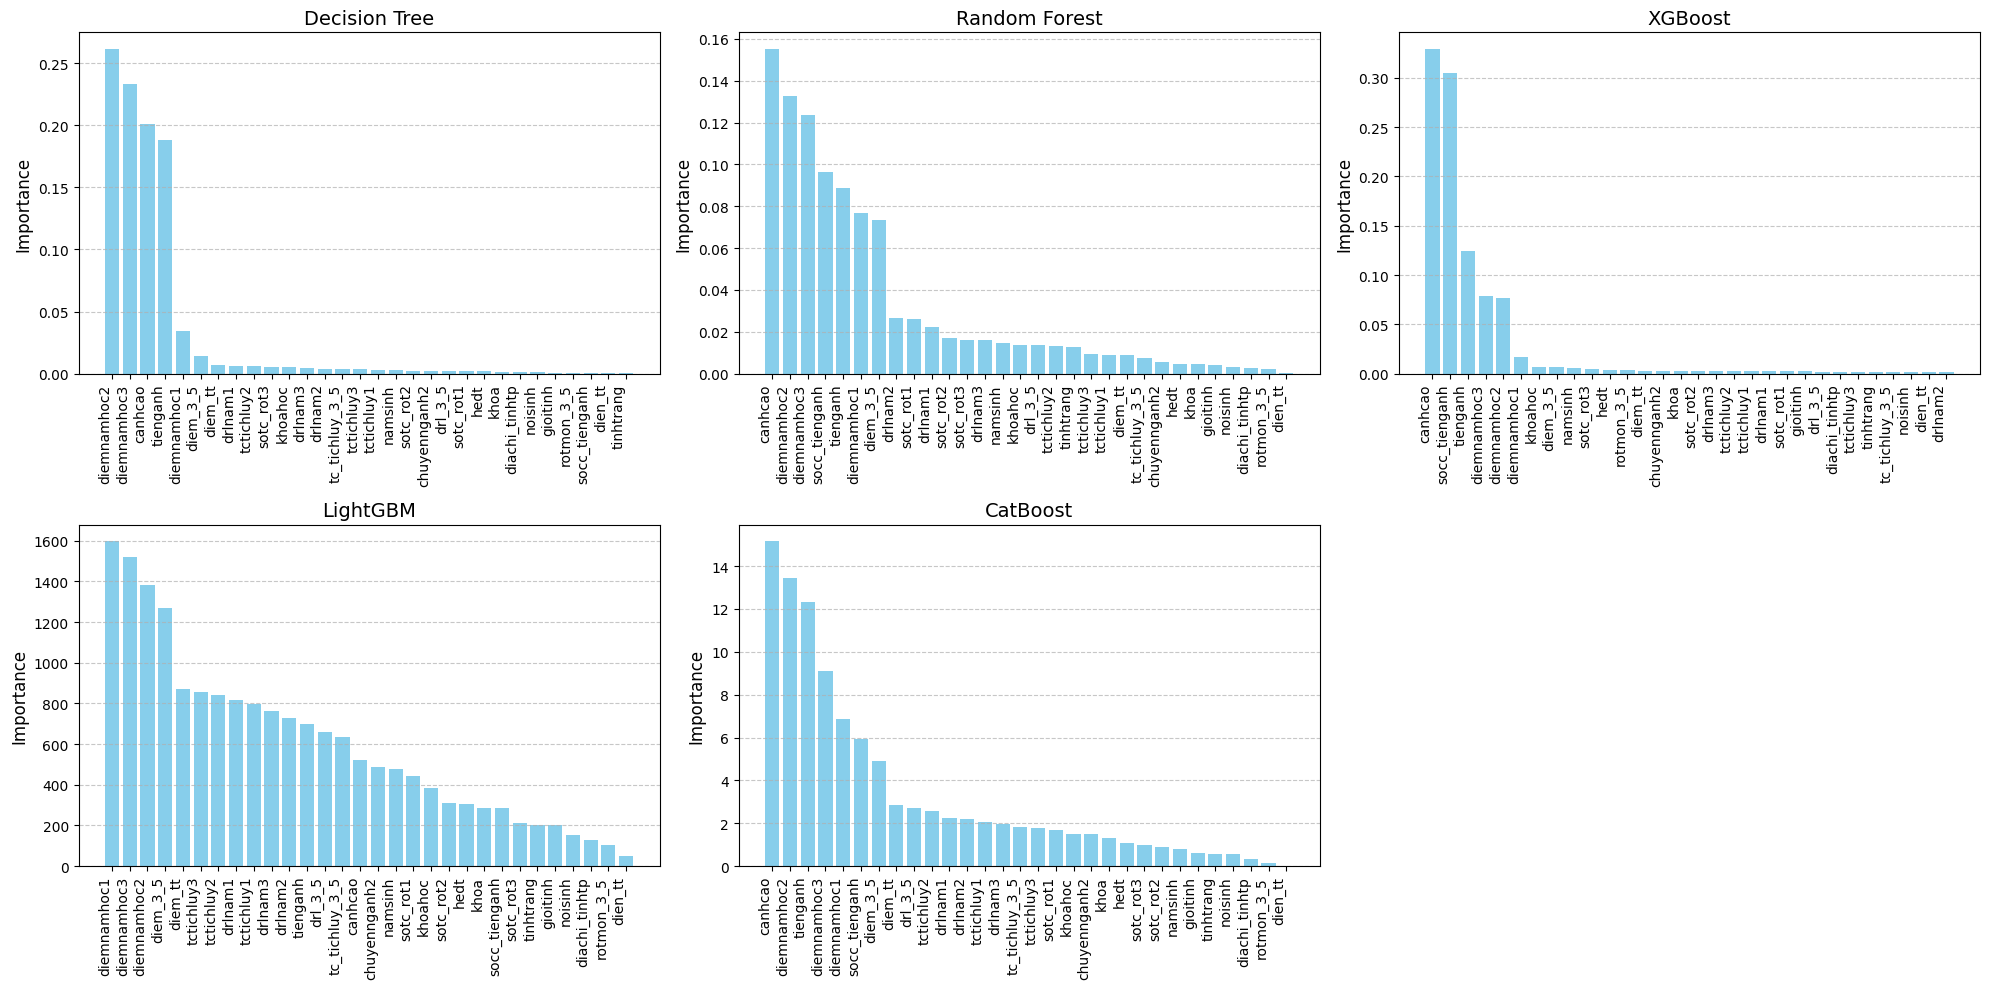

In [126]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train_resampled.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

## 2. Sử dụng đánh trọng số nhãn

In [127]:
y_train.value_counts()

0    4746
3     895
4     358
2     159
1      93
5       9
Name: xeploai, dtype: int64

In [128]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2, 3, 4, 5]),
    y=y_train
)

In [129]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [130]:
class_weight_dict = {i: w for i, w in enumerate(class_weights)}
print("Trọng số nhãn:", class_weight_dict)

Trọng số nhãn: {0: 0.21983424638291896, 1: 11.21863799283154, 2: 6.561844863731656, 3: 1.1657355679702048, 4: 2.914338919925512, 5: 115.92592592592592}


### 2.1 Xét 3.5 năm học

#### a) Decision Tree

In [131]:
model_dt = DecisionTreeClassifier(class_weight=class_weight_dict, random_state=42)

In [132]:
model_dt.fit(X_train, y_train)
y_pred_ts_dt = model_dt.predict(X_test)

Weighted f1_score:  0.909119390223294
Macro f1_score:  0.7045273792648729
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1165
           1       0.88      0.78      0.82        18
           2       0.57      0.64      0.60        50
           3       0.80      0.80      0.80       227
           4       0.75      0.66      0.70       102
           5       0.50      0.25      0.33         4

    accuracy                           0.91      1566
   macro avg       0.74      0.68      0.70      1566
weighted avg       0.91      0.91      0.91      1566



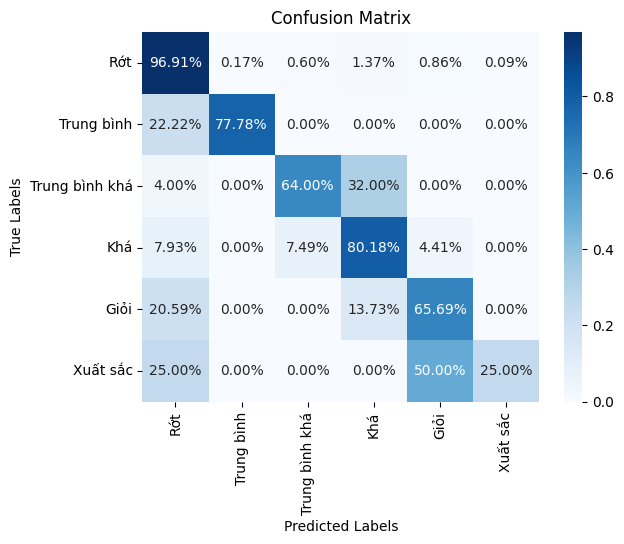

In [133]:
visualization(y_test, y_pred_ts_dt)

#### b) Random Forest

In [134]:
model_rf = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

In [135]:
model_rf.fit(X_train, y_train)
y_pred_ts_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9396999226060186
Macro f1_score:  0.7092646871337048
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.78      0.64      0.70        50
           3       0.82      0.93      0.87       227
           4       0.78      0.84      0.81       102
           5       0.00      0.00      0.00         4

    accuracy                           0.94      1566
   macro avg       0.71      0.71      0.71      1566
weighted avg       0.94      0.94      0.94      1566



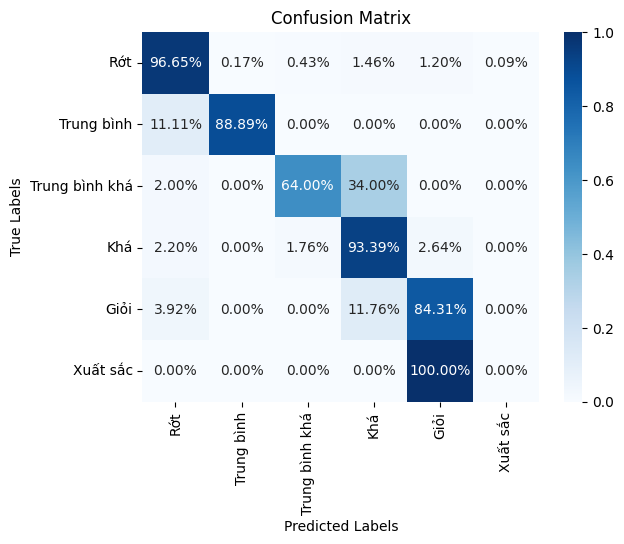

In [136]:
visualization(y_test, y_pred_ts_rf)

#### c) XGBoost

In [137]:
model_xg = XGBClassifier(random_state=42)

In [138]:
model_xg.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9433103804220863
Macro f1_score:  0.779522007466527
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1165
           1       0.90      1.00      0.95        18
           2       0.66      0.78      0.72        50
           3       0.85      0.89      0.87       227
           4       0.78      0.89      0.83       102
           5       0.50      0.25      0.33         4

    accuracy                           0.94      1566
   macro avg       0.78      0.80      0.78      1566
weighted avg       0.95      0.94      0.94      1566



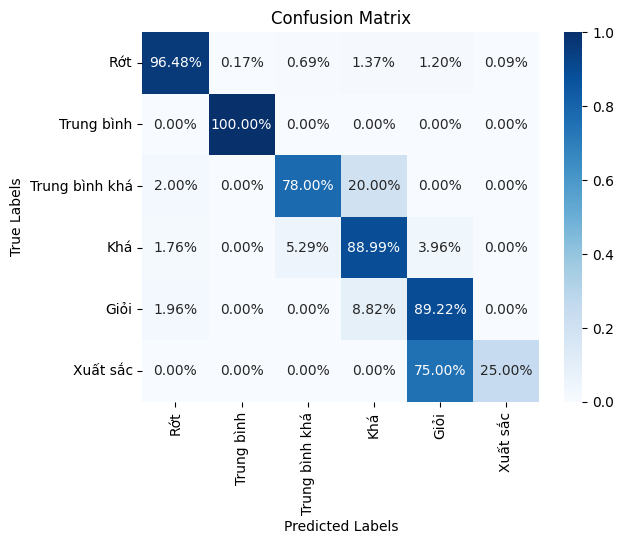

In [139]:
visualization(y_test, y_pred_ts_xg)

#### d) LightGBM

In [140]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [141]:
model_lgb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 30
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Weighted f1_score:  0.9415206166445704
Macro f1_score:  0.8294863526393943
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.70      0.78      0.74        50
           3       0.83      0.89      0.86       227
           4       0.80      0.84      0.82       102
           5       0.60      0.75      0.67         4

    accuracy                           0.94      1566
   macro avg       0.80      0.86      0.83      1566
weighted avg       0.94      0.94      0.94      1566



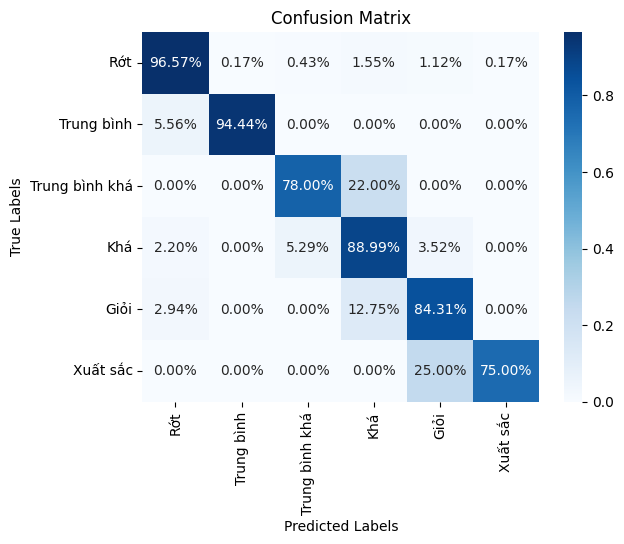

In [142]:
visualization(y_test, y_pred_ts_lg)

#### e) CatBoost

In [143]:
model_cb = CatBoostClassifier(random_state=42)

In [144]:
model_cb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.5445110	total: 42.4ms	remaining: 42.4s
1:	learn: 1.3795686	total: 58.1ms	remaining: 29s
2:	learn: 1.2428836	total: 70.9ms	remaining: 23.6s
3:	learn: 1.1393178	total: 86.2ms	remaining: 21.5s
4:	learn: 1.0417548	total: 107ms	remaining: 21.4s
5:	learn: 0.9583718	total: 124ms	remaining: 20.5s
6:	learn: 0.8962199	total: 140ms	remaining: 19.9s
7:	learn: 0.8503725	total: 155ms	remaining: 19.2s
8:	learn: 0.8076257	total: 171ms	remaining: 18.8s
9:	learn: 0.7658934	total: 189ms	remaining: 18.7s
10:	learn: 0.7167960	total: 209ms	remaining: 18.8s
11:	learn: 0.6775578	total: 221ms	remaining: 18.2s
12:	learn: 0.6409816	total: 238ms	remaining: 18.1s
13:	learn: 0.6047188	total: 251ms	remaining: 17.7s
14:	learn: 0.5755878	total: 268ms	remaining: 17.6s
15:	learn: 0.5425890	total: 288ms	remaining: 17.7s
16:	learn: 0.5124216	total: 301ms	remaining: 17.4s
17:	learn: 0.4924135	total: 316ms	remaining: 17.3s
18:	learn: 0.4715114	total: 336ms	remaining: 17.4s
19:	learn

Weighted f1_score:  0.9360564251753993
Macro f1_score:  0.756981772737396
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1165
           1       0.72      1.00      0.84        18
           2       0.65      0.80      0.71        50
           3       0.83      0.89      0.86       227
           4       0.75      0.90      0.82       102
           5       0.50      0.25      0.33         4

    accuracy                           0.93      1566
   macro avg       0.74      0.80      0.76      1566
weighted avg       0.94      0.93      0.94      1566



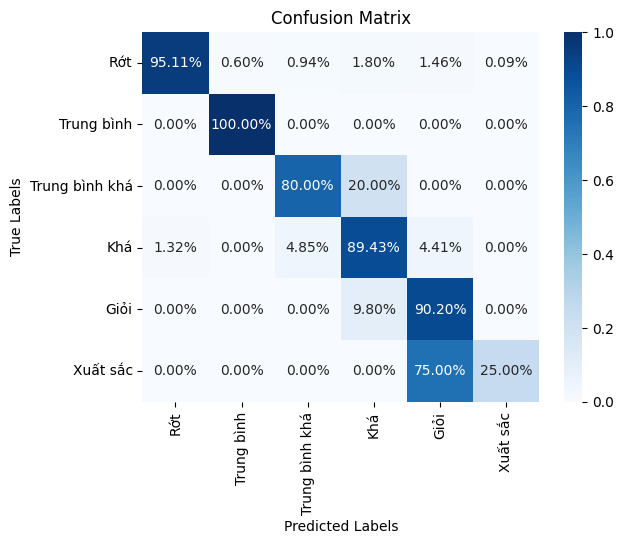

In [145]:
visualization(y_test, y_pred_ts_cb)

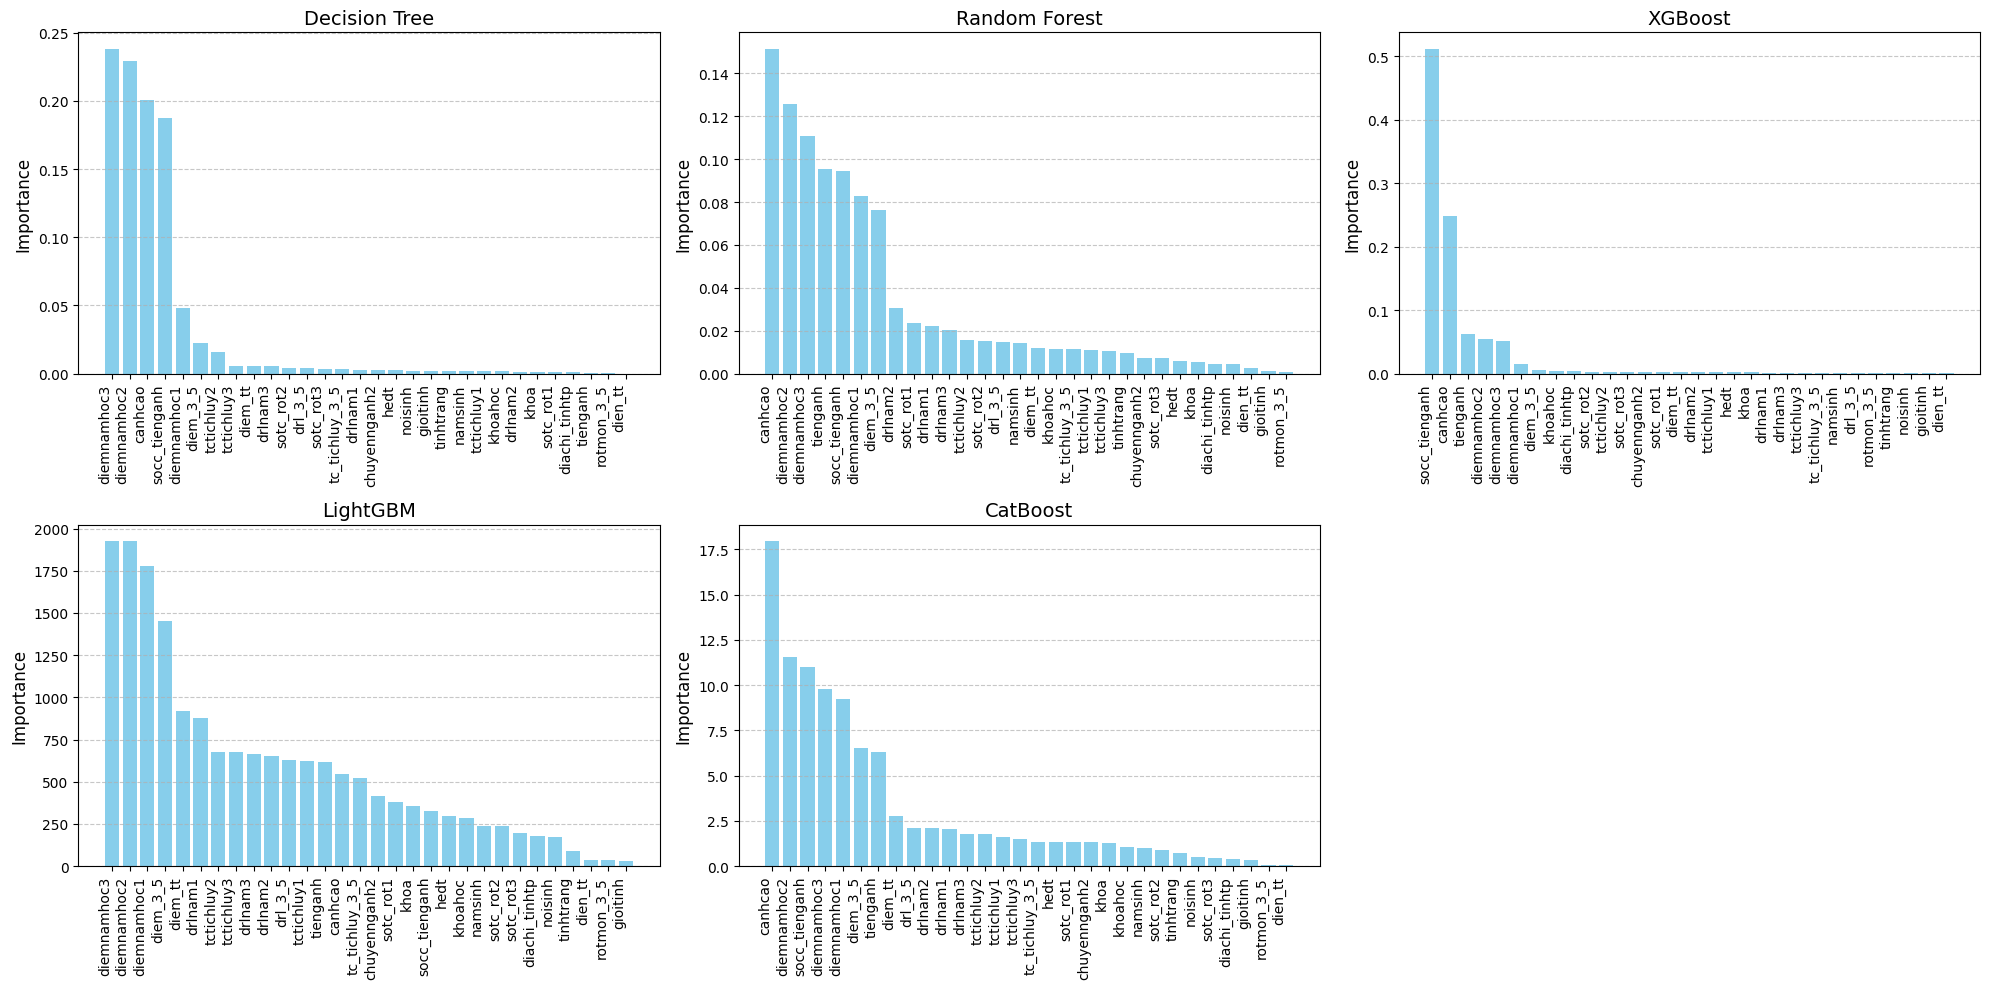

In [146]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# V. Kết quả

## 1. Không xử lý mất cân bằng

In [147]:
df_res = make_results_df(y_test, [y_pred_dt, y_pred_rf, y_pred_xg, y_pred_lg, y_pred_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
df_res

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.915070,0.750136,0.714476,0.729811
Random Forest,0.939974,0.685138,0.699452,0.690646
XGBoost,0.945722,0.822403,0.791030,0.804156
LightGBM,0.884419,0.554253,0.625291,0.577431
CatBoost,0.945722,0.884256,0.739256,0.772496


## 2. SMOTE

In [149]:
df_res_sm = make_results_df(y_test, [y_pred_resampled_dt, y_pred_resampled_rf, y_pred_resampled_xg, y_pred_resampled_lg, y_pred_resampled_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
df_res_sm

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.923372,0.686621,0.688907,0.687533
Random Forest,0.939336,0.700299,0.733496,0.714232
XGBoost,0.945722,0.823107,0.823024,0.820346
LightGBM,0.946999,0.709224,0.738046,0.722968
CatBoost,0.945083,0.734578,0.801226,0.764746


## 3. Đánh trọng số nhãn

In [151]:
df_res_ts = make_results_df(y_test, [y_pred_ts_dt, y_pred_ts_rf, y_pred_ts_xg, y_pred_ts_lg, y_pred_ts_cb])

In [152]:
df_res_ts

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.909962,0.743056,0.682584,0.704527
Random Forest,0.939974,0.710393,0.712078,0.709265
XGBoost,0.941890,0.780821,0.796139,0.779522
LightGBM,0.939974,0.801232,0.862186,0.829486
CatBoost,0.933589,0.741421,0.799551,0.756982
